# Classification des documents du procès des groupes américains du tabac

In [1]:
#Listes des imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn import preprocessing
import seaborn as sns

## 1- Analyse  des données

In [2]:
# Chargement du fichier text (affichage des 10 premier résultats)
df=pd.read_csv("data/tobacco-lab_data_Tobacco3482.csv") 
print(df[:10])

                       img_path          label
0  Advertisement/0000136188.jpg  Advertisement
1  Advertisement/0000435350.jpg  Advertisement
2  Advertisement/0000556056.jpg  Advertisement
3  Advertisement/0030048095.jpg  Advertisement
4  Advertisement/0030048989.jpg  Advertisement
5  Advertisement/0030049569.jpg  Advertisement
6    Advertisement/03496270.jpg  Advertisement
7    Advertisement/03567810.jpg  Advertisement
8    Advertisement/03722789.jpg  Advertisement
9    Advertisement/04102204.jpg  Advertisement


Le fichier contient le pas vers l'image à associer dans la colonne *"img_path"* et sa classe dans la colonne *"label"*.

number of data : 3482


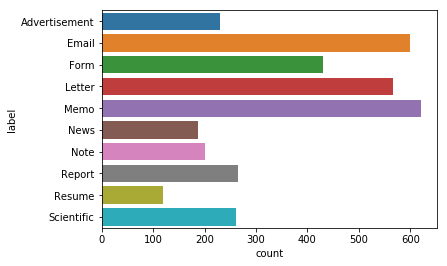

In [3]:
# Plot the statistics of each label
sns.countplot(data=df,y='label')
print('number of data :', df.shape[0])

Le dataset contient 3482 images correspondant à des fichiers text collectés, séparés en 10 classe correspondantes respectivement à :

- Advertissement
- Email
- Form
- Letter
- Memo
- News
- Note
- Report
- Resume
- Scientic

Ci-dessus l'on peut observer un graphique qui indique la proportion de chaque classe dans le dataset.

In [4]:
# accéder au text
path='data/Tobacco3482-OCR/'+str(df.img_path[0][:-3])+'txt'

# Extraction du texte
with open(path) as myfile:
    content = myfile.readlines()

In [5]:
# On extrait le texte des fichiers et l'on stocke chaque texte dans une liste text
# On stocke les label de chaque text dans une liste label
label=[]
text=[]
for i in range(df.shape[0]):
    path=path='data/Tobacco3482-OCR/'+str(df.img_path[i][:-3])+'txt'
    with open(path) as myfile:
        content = myfile.readlines()
        for j,e in enumerate(content):
            #retrait des /n pour une meilleurs lisibilité et augmente les performances
            content[j]=e.rstrip("\n")
    text.append(content)
    label.append(df.label[i])
print(text[0])
print(np.unique(label))

['A Mpertant as yar', 'sesiye teaetered cabiieess. Baely', '', 'doesn’) keow bea te', 'Bitton Aau-Fotne bl resin syste. Cant', '', 'viduiiliy crafted. Parenter', 'tiott, Most eapennese liste rn siichinng', '', 'Holimars. Costlicr of course', '', '      ', '  ', ' ', '', '“Has Oetenined -', '', 'Wainy: Thy', 'ie Hoel? h.', '', 'That Cia', '', 'Marg a Féme awe ii na eager ref Hizon a ol', '', ' ', '', ' ', '', 'Ra a', '', '6P9S70099']
['Advertisement' 'Email' 'Form' 'Letter' 'Memo' 'News' 'Note' 'Report'
 'Resume' 'Scientific']


In [6]:
# création d'un dataframe contenant chaque test et les labels associés
cont=pd.DataFrame({'text':text, 'label':label})
print(cont[:10])
print(cont.shape)

                                                text          label
0  [A Mpertant as yar, sesiye teaetered cabiieess...  Advertisement
1  [TE che fitm, , m66400 7127, , KOOLS are the o...  Advertisement
2  [so ARN Rr nr, , BWR Ga ||, , Vending Operator...  Advertisement
3  [MARCH 24,19 VO — 3. Tersrearep, ,  , , ‘ yi i...  Advertisement
4  [~, , Spend a milder moment qs, with Raleigh.,...  Advertisement
5  [SR Onrel ules cee, Nee dss, , The one tales W...  Advertisement
6  [&, BR. :, er non, , be 4, op Re eo eee ee eee...  Advertisement
7  [{ae} BUIseaUT OY |, --uoanyf{sanosdun |., LIY...  Advertisement
8  [. “So that’s he, any newspapel, “That's how,,...  Advertisement
9  [BROWN & “WILLIAM ON:, , ;, mY To Man, , Marfa...  Advertisement
(3482, 2)


In [7]:
# Texte ci-dessus stocker sous forme de séquences de mots
# faire de text un text et non une sequence de mot
cont['text']=[" ".join(text) for text in cont['text'].values]
print(cont[:5])

                                                text          label
0  A Mpertant as yar sesiye teaetered cabiieess. ...  Advertisement
1  TE che fitm  m66400 7127  KOOLS are the only c...  Advertisement
2  so ARN Rr nr  BWR Ga ||  Vending Operators    ...  Advertisement
3  MARCH 24,19 VO — 3. Tersrearep     ‘ yi ills :...  Advertisement
4  ~  Spend a milder moment qs with Raleigh.  = A...  Advertisement


## 2- Traitement des données

### 2-1 Transformation en sac de mots

In [8]:
#Séparation des données en ensemble de test et d'apprentissage
X_train,X_test, y_train,y_test = train_test_split(cont.text, cont.label, test_size=0.20, 
                                                random_state=42)

print(y_train[:10])

1134          Form
568          Email
1706        Letter
2619          News
2098          Memo
2268          Memo
611          Email
1533        Letter
3195        Resume
3293    Scientific
Name: label, dtype: object


On ne possède pas une enorme quantité de données (~3000) donc on choisit de prendre 20% des données pour former l'ensemble de test (voir cellule ci-dessus).

In [9]:
print('nb exemple apprentissage :' ,X_train.shape)
print('nb exemple de test:', X_test.shape)


nb exemple apprentissage : (2785,)
nb exemple de test: (697,)


Après avoir séparé les différents ensemble on transforme nos texte en vecteur qui pourront être analyser/calculer par les modèles.

Pour réaliser cela on utilise la méthode **_CountVectorizer_** de **sklearn**. Cette méthode effectue la convertion d'une collection de document texte en une matrice qui renvoie le nombre d'occurence de chaque symbole (du dico associé) pour chaque texte. On a fixe le nombre de paramètres des matrices à 3000.

In [10]:
# Vectorisation
vectorizer = CountVectorizer(max_features=3000)
vectorizer.fit(X_train)
X_train_vect = vectorizer.transform(X_train)
X_test_vect= vectorizer.transform(X_test)

print(X_test_vect.shape)

(697, 3000)


### 2.2 Représentation tf idf 

On réalise une transformation **_tf-idf_** sur les collection.

La transformation **tf** correspond à calculer la fréquence de chaque mots (nombre d'occurence du mot/ sur le nombre total de mots) et on prend l'inverse, la **_tf-idf_** qui nous permet d'associer des poids qui permettrons de différencier les mot-clés des mots de liason ou pronom...etc (que l'on retouve avec de grande fréquences dans tous les documents car ils correspondent à la syntaxes de la langue mais n'apporte pas d'informations). 

In [11]:
# Représentation TF_IDF
tf_transformer = TfidfTransformer().fit(X_train_vect)

# transformation tf-idf des ensemble train, dev et test
X_train_tf = tf_transformer.transform(X_train_vect)
X_test_tf = tf_transformer.transform(X_test_vect)


## 3- Classification

### 3-1 Classifieur naives bayes

In [12]:
# Entrainement avec un classifieur naif multinomial
# train a Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB

#Definition du classifieur
mnb=MultinomialNB()

# Entrainement du classifieur
mnb.fit(X_train_vect, y_train)

# Observasion de la précision
acc_test=mnb.score(X_test_vect, y_test)
y_pred=mnb.predict(X_test_vect)

print('Les préscion obtenus sont : ')
print('données test précision:',acc_test )

Les préscion obtenus sont : 
données test précision: 0.7302725968436155


Précision de 73% avec le classifieur de naïves bayes et une représentation tf_idf 

In [13]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

label=np.unique(cont.label)
target_names = [c for c in label ]
print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, ))

               precision    recall  f1-score   support

Advertisement       0.73      0.67      0.70        57
        Email       0.93      0.93      0.93       135
         Form       0.81      0.82      0.81        88
       Letter       0.75      0.72      0.74       122
         Memo       0.60      0.73      0.66       109
         News       0.69      0.74      0.71        34
         Note       0.33      0.33      0.33        36
       Report       0.59      0.56      0.57        48
       Resume       1.00      1.00      1.00        15
   Scientific       0.68      0.49      0.57        53

    micro avg       0.73      0.73      0.73       697
    macro avg       0.71      0.70      0.70       697
 weighted avg       0.73      0.73      0.73       697

[[ 38   1   2   1   5   2   8   0   0   0]
 [  0 126   0   3   4   1   0   1   0   0]
 [  3   1  72   2   2   0   8   0   0   0]
 [  3   0   0  88  18   2   1   9   0   1]
 [  0   5   1  15  80   2   1   3   0   2]
 [  3   0   

### 3-2 Classification with Neural networks

In [27]:
import ast
import os
#from nn_utils import TrainingHistory
from keras.layers import Dense, Embedding, Input
from keras.layers import GRU, Dropout, MaxPooling1D, Conv1D, Flatten
from keras.models import Model
import numpy as np
import itertools
from keras.utils import np_utils
from sklearn.metrics import (classification_report, 
                             precision_recall_fscore_support, 
                             accuracy_score)

from keras.preprocessing import text, sequence

In [28]:
# Model parameters
MAX_FEATURES = 2000
MAX_TEXT_LENGTH = 2000
EMBED_SIZE  = 100
BATCH_SIZE = 16
EPOCHS = 20
VALIDATION_SPLIT = 0.1

In [29]:
def get_train_test(train_raw_text, test_raw_text):
    
    tokenizer = text.Tokenizer(num_words=MAX_FEATURES)

    tokenizer.fit_on_texts(list(train_raw_text))
    train_tokenized = tokenizer.texts_to_sequences(train_raw_text)
    test_tokenized = tokenizer.texts_to_sequences(test_raw_text)
    return sequence.pad_sequences(train_tokenized, maxlen=MAX_TEXT_LENGTH), \
           sequence.pad_sequences(test_tokenized, maxlen=MAX_TEXT_LENGTH)

In [30]:
def get_model():

    inp = Input(shape=(MAX_TEXT_LENGTH,))
    model = Embedding(MAX_TEXT_LENGTH,EMBED_SIZE)(inp)
    model = Dropout(0.3)(model)
    model = Conv1D(filters=64, kernel_size=3, padding='same', activation='relu')(model)
    model = MaxPooling1D(pool_size=2)(model)
    model = Flatten()(model)
    model = Dense(10, activation="softmax")(model)
    model = Model(inputs=inp, outputs=model)
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model

def model_2():
    inp = Input(shape=(MAX_TEXT_LENGTH,))
    model = Embedding(MAX_TEXT_LENGTH,EMBED_SIZE)(inp)
    model = Dropout(0.3)(model)
    model = Conv1D(filters=32, kernel_size=5, padding='same', activation='relu')(model)
    model = MaxPooling1D(pool_size=4)(model)
    
    model = Dropout(0.25)(model)
    model = Conv1D(filters=64, kernel_size=3, padding='same', activation='relu')(model)
    model = MaxPooling1D(pool_size=2)(model)
     
    model = Flatten()(model)
    model = Dense(10, activation="softmax")(model)
    model = Model(inputs=inp, outputs=model)
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model


In [31]:
def train_fit_predict(model, x_train, x_test, y):
    
    model.fit(x_train, y,
              batch_size=BATCH_SIZE,
              epochs=EPOCHS, verbose=1,
              validation_split=VALIDATION_SPLIT)

    return model.predict(x_test)

In [32]:
# Get the list of different classes
CLASSES_LIST = np.unique(y_train)
n_out = len(CLASSES_LIST)
print(CLASSES_LIST)

# Convert clas string to index
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(CLASSES_LIST)
y_train = le.transform(y_train) 
y_test = le.transform(y_test) 
train_y_cat = np_utils.to_categorical(y_train, n_out)

# get the textual data in the correct format for NN
x_vec_train, x_vec_test = get_train_test(X_train, X_test)
print(len(x_vec_train), len(x_vec_test))

# define the NN topology
model = model_2()

# Define training procedure
#model.fit(x=x_vec_train, y=train_y_cat, batch_size=16, epochs=10, verbose=1,)


[0 1 2 3 4 5 6 7 8 9]
2785 697
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 2000)              0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 2000, 100)         200000    
_________________________________________________________________
dropout_6 (Dropout)          (None, 2000, 100)         0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 2000, 32)          16032     
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 500, 32)           0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 500, 32)           0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 500, 64) 

In [33]:
#test_y_cat = np_utils.to_categorical(y_test, n_out)
#score=model.evaluate(x_vec_test, test_y_cat)
#print(score)

In [34]:
y_predicted=train_fit_predict(model, x_vec_train, x_vec_test, train_y_cat)

Train on 2506 samples, validate on 279 samples
Epoch 1/20
2506/2506 [==============================] - 29s 11ms/step - loss: 1.9102 - acc: 0.2977 - val_loss: 1.8088 - val_acc: 0.3369
Epoch 2/20
2506/2506 [==============================] - 28s 11ms/step - loss: 1.4682 - acc: 0.4561 - val_loss: 1.2867 - val_acc: 0.5520
Epoch 3/20
2506/2506 [==============================] - 28s 11ms/step - loss: 0.8755 - acc: 0.6748 - val_loss: 1.0771 - val_acc: 0.6201
Epoch 4/20
2506/2506 [==============================] - 28s 11ms/step - loss: 0.5169 - acc: 0.8212 - val_loss: 1.1060 - val_acc: 0.6738
Epoch 5/20
2506/2506 [==============================] - 28s 11ms/step - loss: 0.3403 - acc: 0.8755 - val_loss: 1.1876 - val_acc: 0.6738
Epoch 6/20
2506/2506 [==============================] - 29s 11ms/step - loss: 0.2179 - acc: 0.9290 - val_loss: 1.2167 - val_acc: 0.7133
Epoch 7/20
2506/2506 [==============================] - 28s 11ms/step - loss: 0.1763 - acc: 0.9437 - val_loss: 1.3621 - val_acc: 0.6918
E

In [35]:
y_pred=[]
for i in range(len(y_test)):
    y_pred.append(np.argmax(y_predicted[i]))

In [36]:
y_pred=np.asarray(y_pred)
y_pred

array([5, 4, 9, 3, 4, 6, 1, 6, 4, 1, 2, 7, 3, 4, 0, 4, 3, 8, 4, 4, 4, 1,
       6, 6, 6, 1, 3, 1, 2, 1, 4, 1, 4, 3, 6, 5, 4, 3, 0, 0, 7, 3, 2, 4,
       4, 5, 4, 2, 0, 2, 4, 1, 1, 3, 3, 4, 7, 4, 3, 1, 4, 1, 2, 6, 2, 3,
       5, 9, 1, 9, 2, 2, 2, 7, 9, 7, 1, 5, 3, 2, 1, 6, 4, 5, 4, 4, 1, 7,
       3, 5, 9, 4, 7, 2, 3, 2, 6, 8, 6, 7, 2, 8, 4, 1, 8, 0, 7, 7, 1, 4,
       7, 4, 0, 4, 2, 4, 2, 9, 6, 7, 1, 1, 4, 7, 6, 4, 0, 2, 6, 9, 3, 7,
       2, 3, 0, 4, 9, 7, 4, 8, 4, 4, 3, 3, 9, 2, 2, 3, 4, 6, 2, 7, 5, 0,
       4, 0, 2, 3, 8, 3, 7, 9, 9, 7, 9, 0, 2, 2, 1, 6, 9, 2, 2, 8, 2, 3,
       0, 1, 5, 9, 4, 1, 4, 0, 1, 1, 0, 7, 1, 3, 1, 8, 2, 4, 7, 9, 4, 9,
       4, 3, 2, 1, 2, 3, 2, 4, 1, 1, 1, 4, 4, 4, 0, 2, 9, 5, 9, 3, 3, 1,
       9, 1, 9, 4, 8, 3, 3, 3, 2, 1, 7, 3, 3, 9, 2, 4, 7, 3, 4, 9, 6, 4,
       4, 1, 0, 2, 0, 2, 9, 9, 1, 3, 1, 6, 4, 7, 1, 7, 6, 2, 3, 0, 9, 3,
       3, 8, 1, 0, 4, 0, 1, 1, 4, 2, 1, 1, 0, 4, 6, 2, 3, 2, 4, 3, 2, 1,
       1, 9, 0, 1, 9, 1, 9, 1, 2, 4, 2, 4, 4, 7, 3,

In [37]:
print("Test Accuracy:", accuracy_score(y_test, y_pred))

p, r, f1, s = precision_recall_fscore_support(y_test, y_pred, 
                                              average='micro',
                                              labels=[x for x in 
                                                      np.unique(y_train) 
                                                      if x not in ['CSDECMOTV']])

print('p r f1:  %.1f %.2f %.3f' % (np.average(p, weights=s)*100.0, 
                                 np.average(r, weights=s)*100.0, 
                                 np.average(f1, weights=s)*100.0))


print(classification_report(y_test, y_pred, labels=[x for x in 
                                                       np.unique(y_train) 
                                                       if x not in ['CSDECMOTV']]))

Test Accuracy: 0.7058823529411765
p r f1:  70.6 70.59 70.588
              precision    recall  f1-score   support

           0       0.61      0.53      0.57        57
           1       0.96      0.87      0.91       135
           2       0.83      0.80      0.81        88
           3       0.80      0.61      0.69       122
           4       0.68      0.87      0.77       109
           5       0.69      0.65      0.67        34
           6       0.44      0.56      0.49        36
           7       0.39      0.58      0.47        48
           8       0.94      1.00      0.97        15
           9       0.46      0.40      0.42        53

   micro avg       0.71      0.71      0.71       697
   macro avg       0.68      0.68      0.68       697
weighted avg       0.73      0.71      0.71       697

